In [2]:
import pandas as pd 
import numpy as np 
import palantir 
import scanpy as sc
import os 
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns 
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
matplotlib.rcParams.update(new_rc_params)
matplotlib.rcParams['pdf.fonttype'] = 42 


In [3]:
im_and_spm = sc.read_h5ad('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/Running_palantir/IM_SPM.h5ad')

In [4]:
#im_and_spm = im_and_spm[im_and_spm.obs['subcluster6'].isin(['5','6_0','6_1','12','14']), :]

In [5]:
im_and_spm

AnnData object with n_obs × n_vars = 5654 × 28492
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'DataSet', 'integrated_snn_res.0.85', 'seurat_clusters', 'integrated_snn_res.0.65', 'mygraph_res.0.8', 'subcluster6', 'integrated_snn_res.0.5'
    var: 'features'
    obsm: 'X_umap'

In [6]:
im_and_spm

AnnData object with n_obs × n_vars = 5654 × 28492
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'DataSet', 'integrated_snn_res.0.85', 'seurat_clusters', 'integrated_snn_res.0.65', 'mygraph_res.0.8', 'subcluster6', 'integrated_snn_res.0.5'
    var: 'features'
    obsm: 'X_umap'

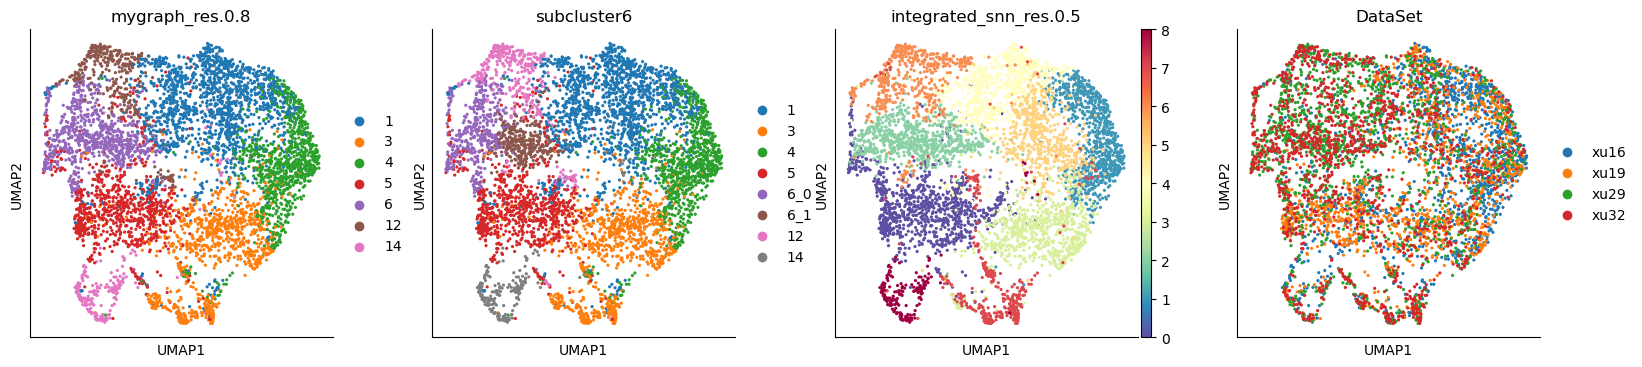

In [7]:
sc.plotting.umap(im_and_spm, color = ['mygraph_res.0.8', 'subcluster6', 'integrated_snn_res.0.5','DataSet'], )

In [8]:
im_and_spm.var.loc[im_and_spm.var['features'] == 'GRMZM2G372364']

,features
GRMZM2G372364,GRMZM2G372364


IM ONLY
Starting Cells 
Subcluster 6, Cluster 3 = IM Stem Cells, GRMZM2G372364

Terminal Cells 
Subcluster 6, cluster 1 = Cortex ,GRMZM2G345700 
Subluster 6, Cluster 4 = Pith, GRMZM2G430849


On IM only run Palantir with Just Cle7 as starting cell, and then also run with Cortex and Pith as Terminally differentiated cells 


IM and SPM 
Starting Cells 
Subcluster 6, Cluster 3 = IM Stem Cells, GRMZM2G372364

Terminal Cells 
Subcluster 6, Cluster 6_0 = Meristem Base, GRMZM2G014729
Subcluster 6, Cluster 6_1 = Determinate Lateral Organ, GRMZM2G529859
Subcluster 6, Cluster 12 = Adaxiam meristem periphery, GRMZM2G072274
Subcluster 6, Cluster 14 = Vasculature, GRMZM2G132794 
Subcluster 6, cluster 1 = Cortex ,GRMZM2G345700 
Subluster 6, Cluster 4 = Pith, GRMZM2G430849


On IM SPM run Palantir with Just Cle7 as starting cell, and then also run with all 6 terminally differentiated 


In [9]:
marker_genes_dict = {
    "Stem Cell": ["GRMZM2G372364", "GRMZM2G047448"],
    "Pith": ["GRMZM2G047448", "GRMZM2G372364"],
    "Cortex":["GRMZM2G047448", "GRMZM2G372364"],

}

In [10]:
im_and_spm.raw = im_and_spm

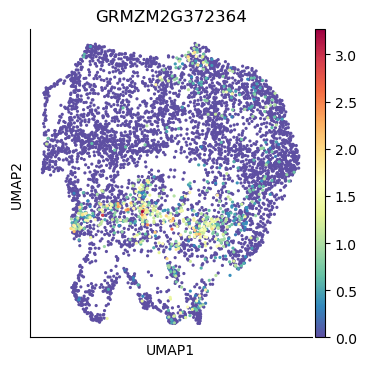

In [11]:
sc.pl.umap(im_and_spm, color ='GRMZM2G372364')

In [12]:
sc.pp.highly_variable_genes(im_and_spm, n_top_genes=1000)
sc.pp.pca(im_and_spm)

In [13]:
dm_res = palantir.utils.run_diffusion_maps(im_and_spm, n_components=5)
ms_data = palantir.utils.determine_multiscale_space(im_and_spm)


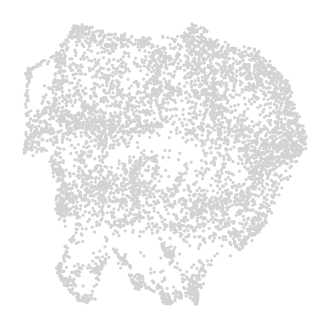

In [15]:
sc.pl.embedding(
    im_and_spm,
    basis="umap",
    frameon=False,
)

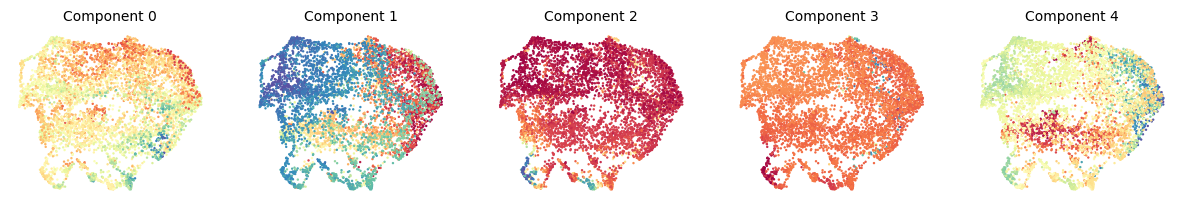

In [39]:
palantir.plot.plot_diffusion_components(im_and_spm) # save for jack
fig = plt.gcf()
fig.savefig('/data/passala/Plots_for_projects/Maize_Palantir/Diffusion_map.pdf',dpi = 1200)

In [43]:
sc.set_figure_params(dpi_save = 1200)

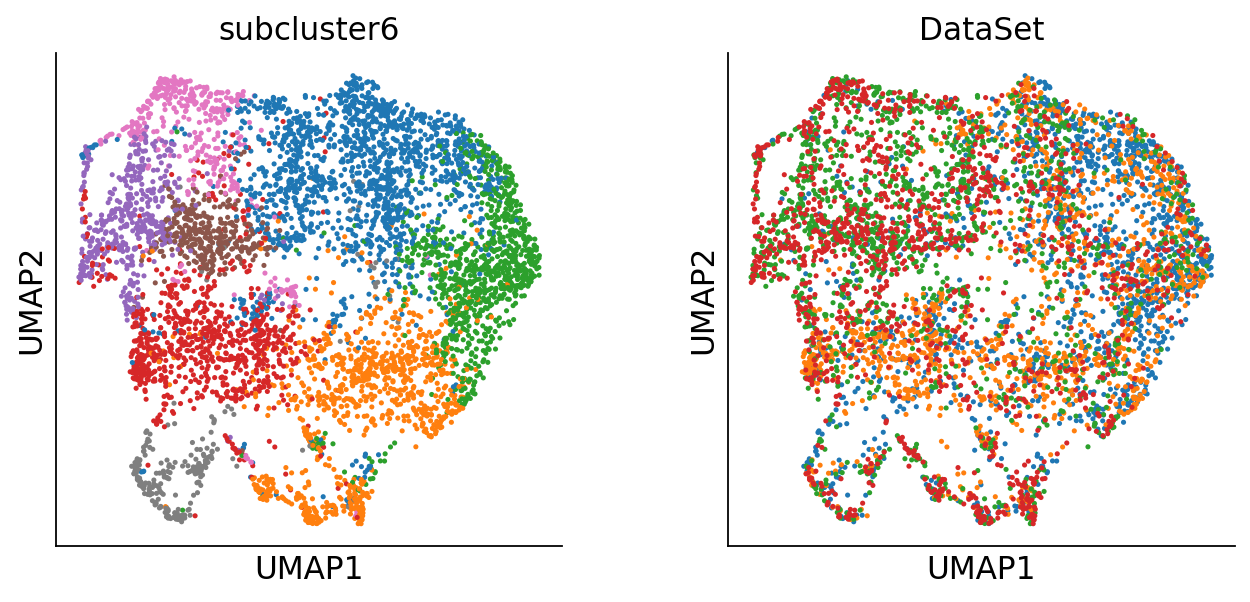

<Figure size 320x320 with 0 Axes>

In [44]:
sc.plotting.umap(im_and_spm, color = [ 'subcluster6','DataSet'],legend_loc = None, save = 'Cluster_and_dataset.pdf' ) # Save for jack
fig = plt.gcf()
fig.savefig('/data/passala/Plots_for_projects/Maize_Palantir/Cluster_and_dataset.pdf',dpi = 1000)

IM and SPM 
Starting Cells 
Subcluster 6, Cluster 3 = IM Stem Cells, GRMZM2G372364

Terminal Cells 
Subcluster 6, Cluster 6_0 = Meristem Base, GRMZM2G014729
Subcluster 6, Cluster 6_1 = Determinate Lateral Organ, GRMZM2G529859
Subcluster 6, Cluster 12 = Adaxiam meristem periphery, GRMZM2G072274
Subcluster 6, Cluster 14 = Vasculature, GRMZM2G132794 
Subcluster 6, cluster 1 = Cortex ,GRMZM2G345700 
Subluster 6, Cluster 4 = Pith, GRMZM2G430849

In [19]:
def identify_strongest_cell_in_cluster_with_marker(imputed_data, cluster, marker_gene, n_cells = 3):
    imputed_data_trimmed = imputed_data[imputed_data.obs["subcluster6"] == cluster, imputed_data.var["features"] == marker_gene]
    imputed_data_dense = pd.DataFrame(data = imputed_data_trimmed.X.todense(), index = imputed_data_trimmed.obs.index, columns = imputed_data_trimmed.var.index)
    return imputed_data_dense.sort_values(by = marker_gene, ascending = False).head(n_cells)

In [20]:
identify_strongest_cell_in_cluster_with_marker(im_and_spm, "3", "GRMZM2G372364")

,GRMZM2G372364
GCACGGTAGAGCCATG-1_2,2.695609
AACCACAGTGGGATTG-1_2,2.310816
CCGATGGAGGTGATAT-1_1,2.256228


In [21]:
identify_strongest_cell_in_cluster_with_marker(im_and_spm, "5", "GRMZM2G372364")

,GRMZM2G372364
GAAGCGAAGGAACGAA-1_4,3.265336
TCAGTCCTCATGAGTC-1_4,2.886190
ATCATTCCACTGCTTC-1_2,2.475721


In [22]:
start_cell = "AACCACAGTGGGATTG-1_2"


In [23]:
identify_strongest_cell_in_cluster_with_marker(im_and_spm, '6_0', "GRMZM2G014729")
identify_strongest_cell_in_cluster_with_marker(im_and_spm, '6_1', "GRMZM2G529859")
identify_strongest_cell_in_cluster_with_marker(im_and_spm, '12', 'GRMZM2G072274')
identify_strongest_cell_in_cluster_with_marker(im_and_spm, '14', 'GRMZM2G132794')
identify_strongest_cell_in_cluster_with_marker(im_and_spm, '1', 'GRMZM2G345700')
identify_strongest_cell_in_cluster_with_marker(im_and_spm, '4', 'GRMZM2G430849')

,GRMZM2G430849
CAATTTCGTCATATGC-1_1,1.916249
ACTTAGGAGCAGGTCA-1_2,1.631119
CATACCCTCATGAGAA-1_1,1.597388


In [24]:
# terminal_states = pd.Series(
#     ["Meristem Base", "Determinate Lateral Organ", "Adaxial Meristem Periphery","Vasculatrue","Cortex","Pith"],
#     index=["ACCTGAAAGGTTACCT-1_1", "ACGTACAAGACATGCG-1_4", "ATCACTTCACGACCTG-1_3", "ATTCCTACACAACCGC-1_1", "GTAGAGGAGGAAAGTG-1_4", "ACTTAGGAGCAGGTCA-1_2"],)

In [25]:
# terminal_states = pd.Series(
#     ["Meristem Base", "Determinate Lateral Organ", "Adaxial Meristem Periphery","Vasculatrue",],
#     index=["ACCTGAAAGGTTACCT-1_1", "ACGTACAAGACATGCG-1_4", "ATCACTTCACGACCTG-1_3", "ATTCCTACACAACCGC-1_1"],
# )

In [26]:
start_states = pd.Series( ['Stem Cells'], index = [start_cell])

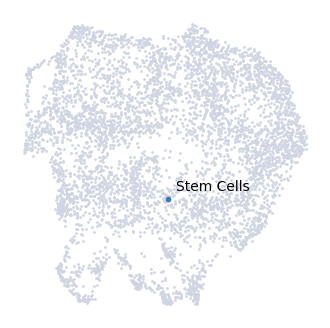

In [27]:
palantir.plot.highlight_cells_on_umap(im_and_spm, start_states)
plt.show()

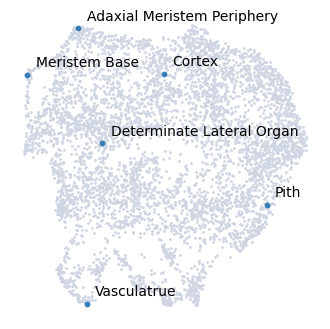

In [28]:
palantir.plot.highlight_cells_on_umap(im_and_spm, terminal_states)
plt.show()

In [35]:
# pr_res = palantir.core.run_palantir(
#     im_and_spm, start_cell, num_waypoints=500, terminal_states=terminal_states
# )

In [34]:
# ### With Terminal states specificed 
# palantir.plot.plot_palantir_results(im_and_spm, s=3)
# plt.show()


In [30]:
pr_res = palantir.core.run_palantir(
    im_and_spm, start_cell, num_waypoints=500,
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.0060651302337646484 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.028104345003763836 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


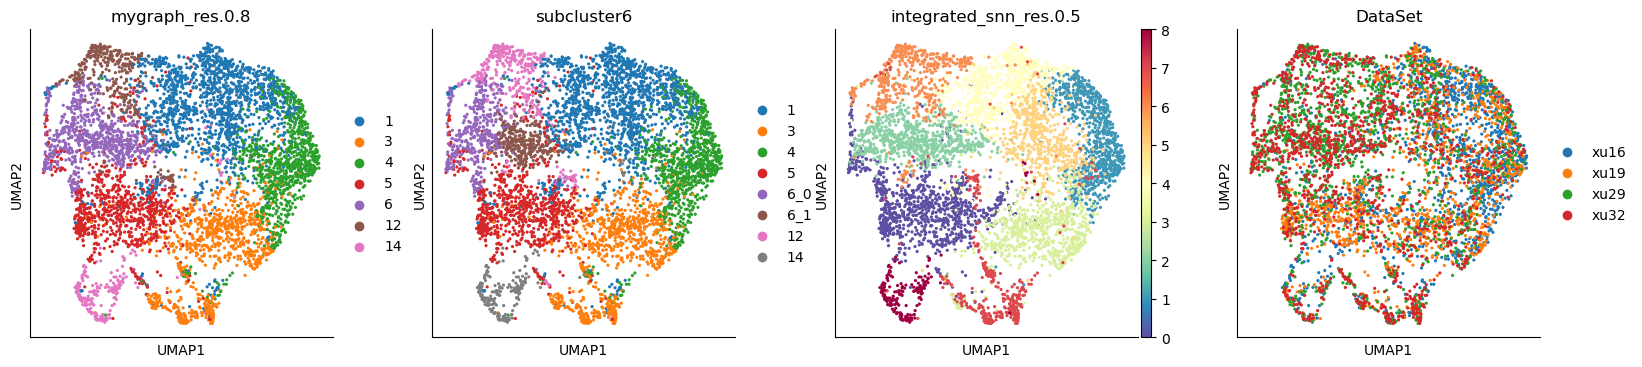

In [31]:
sc.plotting.umap(im_and_spm, color = ['mygraph_res.0.8', 'subcluster6', 'integrated_snn_res.0.5','DataSet'], )

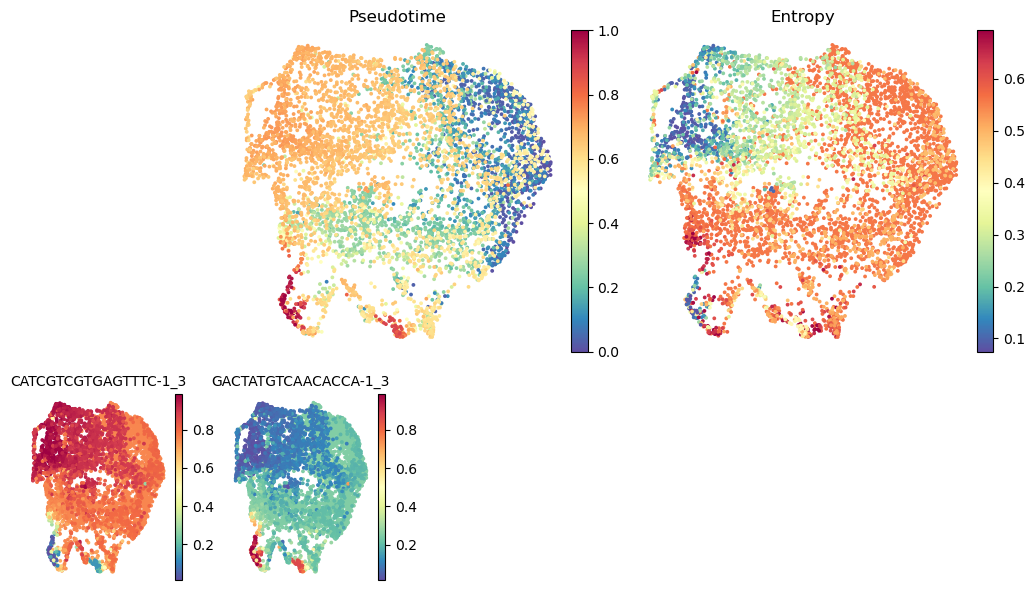

In [38]:
### With No Terminal States specificed -- save for jack
palantir.plot.plot_palantir_results(im_and_spm, s=3)
fig = plt.gcf()
fig.savefig('/data/passala/Plots_for_projects/Maize_Palantir/entropy_and_pseudotime.pdf',dpi = 1200)


In [33]:
gene_trends = palantir.presults.compute_gene_trends(
    im_and_spm,
)

KeyError: 'branch_masks not found in ad.obsm'